In [1]:
import scipy.stats as st
import numpy as np

In [2]:
cars_table=[[256,74],
            [41,42],
            [66,34]]

In [3]:
np.array(cars_table).shape

(3, 2)

In [4]:
# (chi2_statistic, p_value, degrees_of_freedom, expected_frequencies_array) = st.chi2_contingency(contingency table)
st.chi2_contingency(np.array(cars_table))

Chi2ContingencyResult(statistic=26.8113499370887, pvalue=1.5065700686908928e-06, dof=2, expected_freq=array([[233.50877193,  96.49122807],
       [ 58.73099415,  24.26900585],
       [ 70.76023392,  29.23976608]]))

In [5]:
st.chi2.ppf(0.95,df=2)

5.991464547107979

In [ ]:
# Ho: there are no differences
# Ha: there are differences
# p_value = P(table | Ho) = P(table | there are no differences) = 1.51e-6 < 0.05
#seems like our car manufacturers are actually quite differentiated.
#good for them!

In [6]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT4/DAY3/4.04 chi2_contingency - _correlation_ for categoricals/HC4A_unit4_404.csv')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,NaN,479,...,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,...,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,NaN,0,XXXX,NaN,M,R2,3.0,U,497,...,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,NaN,2801,XXXX,NaN,F,R2,1.0,U,1000,...,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,NaN,2001,XXXX,X,F,S2,3.0,H,576,...,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865


In [9]:
matrix_donors = data[data['MDMAUD']!='XXXX']
matrix_donors

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
96,FL,NaN,3812,C1CM,NaN,M,S2,5.0,H,807,...,NaN,110,33,6,29,9702,L1G,18,5.0,37.777778
334,TX,NaN,1506,D1CM,NaN,M,T2,5.0,H,541,...,NaN,106,30,6,30,9702,L1G,9,5.0,68.111111
431,GA,NaN,3001,L1CM,NaN,M,S2,5.0,H,680,...,NaN,100,33,6,31,9702,L1G,26,3.0,20.000000
479,MO,NaN,901,C2CM,NaN,F,R3,1.0,U,187,...,NaN,87,26,7,33,9702,L2G,15,8.0,42.533333
553,FL,NaN,0,D2CM,NaN,F,S2,NaN,NaN,722,...,NaN,126,34,6,25,9702,L1G,20,7.0,71.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83981,WA,NaN,4601,C1CM,NaN,M,R2,6.0,H,842,...,NaN,97,19,5,28,9702,L1G,8,8.0,59.375000
84482,TX,NaN,2204,L1CM,NaN,F,U1,4.0,H,1744,...,NaN,121,30,6,35,9702,L1G,10,7.0,75.800000
85319,SC,NaN,4211,C1CM,NaN,M,C1,5.0,H,870,...,NaN,122,34,5,20,9702,L3G,34,4.0,29.470588
85745,CA,NaN,3601,D2MM,NaN,F,C2,4.0,H,1131,...,NaN,125,32,6,34,9702,L1G,11,40.0,95.454545


In [13]:
data_crosstab = pd.crosstab(matrix_donors['DOMAIN'], matrix_donors['MDMAUD'])
data_crosstab

MDMAUD,C1CM,C1LM,C1MM,C2CM,C2LM,C2MM,C5CM,C5MM,D1CM,D2CM,...,D5TM,I1CM,I1LM,I2CM,I5CM,L1CM,L1LM,L1MM,L2CM,L2TM
DOMAIN,,,,,,,,,,,,,,,,,,,,,
C1,5,0,0,2,0,1,0,0,2,2,...,1,3,1,0,0,7,1,0,0,0
C2,1,0,0,1,0,0,0,0,0,2,...,0,1,0,0,0,3,1,0,1,0
C3,1,0,0,0,0,0,0,0,0,0,...,0,3,0,1,1,1,0,0,0,0
R1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
R2,10,0,0,1,0,0,1,0,3,3,...,0,3,0,0,0,1,1,0,1,1
R3,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
S1,13,4,1,2,1,0,1,1,0,6,...,0,3,2,0,0,5,1,0,2,0
S2,2,1,0,2,0,0,0,0,1,2,...,0,1,0,0,0,5,0,0,2,0
S3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
matrix_donors['DOMAIN'].nunique()

15

In [12]:
matrix_donors['MDMAUD'].nunique()

26

In [14]:
# Computing the degrees of freedom
(15-1)*(26-1)

350

In [16]:
st.chi2.ppf(0.95,df=350) # 0.95 = 1 - 0.05

394.62576022092185

In [17]:
st.chi2.ppf(0.95,df=308)

349.9292136278449

In [18]:
st.chi2_contingency(data_crosstab)

Chi2ContingencyResult(statistic=310.8034344561036, pvalue=0.44454437919070994, dof=308, expected_freq=array([[5.84134615, 0.90865385, 0.12980769, 1.6875    , 0.25961538,
        0.12980769, 0.25961538, 0.12980769, 1.6875    , 2.59615385,
        0.51923077, 0.51923077, 0.51923077, 0.38942308, 3.11538462,
        0.38942308, 0.77884615, 0.12980769, 4.67307692, 0.90865385,
        0.12980769, 1.16826923, 0.12980769],
       [2.8125    , 0.4375    , 0.0625    , 0.8125    , 0.125     ,
        0.0625    , 0.125     , 0.0625    , 0.8125    , 1.25      ,
        0.25      , 0.25      , 0.25      , 0.1875    , 1.5       ,
        0.1875    , 0.375     , 0.0625    , 2.25      , 0.4375    ,
        0.0625    , 0.5625    , 0.0625    ],
       [1.73076923, 0.26923077, 0.03846154, 0.5       , 0.07692308,
        0.03846154, 0.07692308, 0.03846154, 0.5       , 0.76923077,
        0.15384615, 0.15384615, 0.15384615, 0.11538462, 0.92307692,
        0.11538462, 0.23076923, 0.03846154, 1.38461538, 0.26

In [ ]:
# accept null hypothesis -> Ho: no relationship -> they are independent
# There is not enough evidence that people from different urban sprawls lapse faster/slower 

In [19]:
narrowdown_states = data[(data['STATE']== 'CA')|(data['STATE'] == 'IL')]

In [20]:
data_crosstab = pd.crosstab(narrowdown_states['DOMAIN'], narrowdown_states['STATE'], margins = False)
data_crosstab

STATE,CA,IL
DOMAIN,,
C1,1091,403
C2,1090,435
C3,448,251
R1,203,56
R2,639,646
R3,154,195
S1,3108,961
S2,1382,632
S3,224,121


In [21]:
narrowdown_states['DOMAIN'].nunique()-1

15

In [22]:
narrowdown_states['DOMAIN'].unique()

array(['T2', 'S1', 'R2', 'U1', 'C1', 'T1', 'C2', 'U2', 'U4', 'S3', 'C3',
       'S2', 'T3', 'U3', nan, 'R3', 'R1'], dtype=object)

In [23]:
narrowdown_states.shape

(21141, 28)

In [24]:
data_crosstab.shape

(16, 2)

In [25]:
# Number of degrees of freedom
# (number_of_columns-1)*(number_of_rows-1)
# (data_crosstab.shape[0]-1)*(data_crosstab.shape[1]-1)
(data_crosstab.shape[0]-1)*(data_crosstab.shape[1]-1)

15

In [26]:
# What is the critical value that corresponds to an alpha=0.05 with a chi2 with 15 degrees of freedom?
st.chi2.ppf(0.95,df=15)

24.995790139728616

In [27]:
st.chi2_contingency(data_crosstab)

Chi2ContingencyResult(statistic=967.0543195075566, pvalue=1.546290000695185e-196, dof=15, expected_freq=array([[1077.25453227,  416.74546773],
       [1099.60720329,  425.39279671],
       [ 504.01667875,  194.98332125],
       [ 186.75296108,   72.24703892],
       [ 926.55426638,  358.44573362],
       [ 251.64781242,   97.35218758],
       [2933.96833454, 1135.03166546],
       [1452.20256224,  561.79743776],
       [ 248.76359681,   96.23640319],
       [ 682.11699299,  263.88300701],
       [1008.03335751,  389.96664249],
       [ 142.04761905,   54.95238095],
       [1936.02973169,  748.97026831],
       [1252.47063089,  484.52936911],
       [ 795.32245589,  307.67754411],
       [ 418.2112642 ,  161.7887358 ]]))

In [ ]:
# null hypothesis = no differences -> no relationship -> independent
# reject null hypothesis -> NOT indendent -> there is a relationship
# There is plenty of evidence that states and urban sprawl levels are NOT independent

In [ ]:
#Steps for the chi2 test:
#
# H0: columns are independent/not related
# H1: columns are related
# 1 - Get the crosstable
# 2 - Get the number of degrees of freedom
# 3 - Get the chi2 of your crosstable -> st.chi2_contingency() ->(chi2, p_value, degrees_of_freedom, array_of_expected_prequencies)
# 4 - Get the critical value of the chi2 distribution with (number of degrees of freedom). st.chi2.ppf(confidence_level,df=degrees_of_freedom)
# 5 - Option_1 -> Compare your chi2 against the critical value.
#.      if chi2 < critical_value -> Accept H0
#       otherwise -> Reject H0
#.  - Option_2 > Compare your p_value against the significance level (alpha)
#.      if p_value < alpha -> Reject H0
#.      otherwise -> Accept H0

In [ ]:
#ACTIVITY: Do INCOME vs GENDER

In [ ]:
import pandas as pd

In [28]:
data_crosstab = pd.crosstab(narrowdown_states['INCOME'], narrowdown_states['GENDER'], margins = False)
data_crosstab

GENDER,F,M
INCOME,,
1.0,1072,683
2.0,1247,826
3.0,816,565
4.0,1449,1225
5.0,2027,1620
6.0,1397,1177
7.0,1140,977


In [29]:
st.chi2_contingency(data_crosstab)

Chi2ContingencyResult(statistic=48.23520205156102, pvalue=1.060408284807003e-08, dof=6, expected_freq=array([[ 989.75032365,  765.24967635],
       [1169.08969854,  903.91030146],
       [ 778.82917206,  602.17082794],
       [1508.02983786, 1165.97016214],
       [2056.76320819, 1590.23679181],
       [1451.63380803, 1122.36619197],
       [1193.90395167,  923.09604833]]))

In [ ]:
# p_value < 0.05 -> reject Ho -> reject ( H0 there are no differences) -> there are differences
# Indeed there seems to be evidence that INCOME is NOT independent from GENDER

# Multicollinearity and VIF - Variance Inflation Factor

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
savings = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT4/DAY3/4.04 chi2_contingency - _correlation_ for categoricals/savings.csv')
savings.head()

,checking_acc,savings_acc,investment_acc,Total Savings
0,39578.90,45997.10,21394.00,106970
1,30744.25,36694.75,31736.00,99175
2,30816.85,53132.50,22315.65,106265
3,30720.86,39195.58,36017.56,105934
4,28838.40,28838.40,32443.20,90120


In [32]:
savings.corr()

,checking_acc,savings_acc,investment_acc,Total Savings
checking_acc,1.000000,-0.586695,0.093721,0.283531
savings_acc,-0.586695,1.000000,-0.593728,0.235279
investment_acc,0.093721,-0.593728,1.000000,0.304562
Total Savings,0.283531,0.235279,0.304562,1.000000


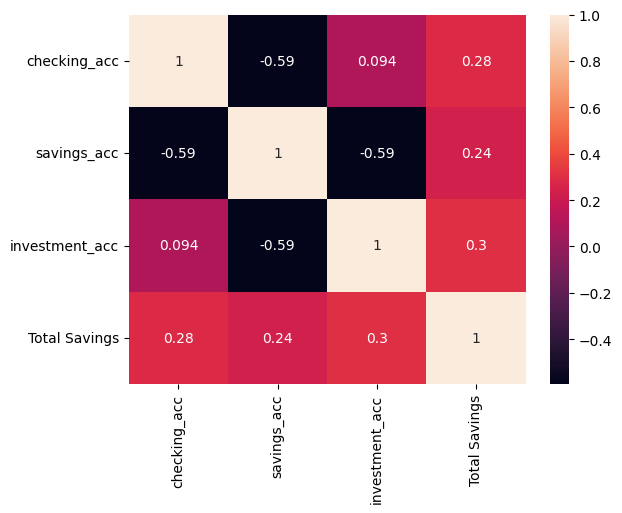

In [33]:
sns.heatmap(savings.corr(), annot=True)
plt.show()

In [ ]:
#we suspect "Total savings" is actually correlated with the others...

In [ ]:
# Control. = 0 + 1 * 'checking_acc' +. 1 * 'savings_acc'. +.  1 * 'investment_acc' 
savings['Control'] = 0 + 1* savings['checking_acc'] + 1.* savings['savings_acc'] + 1 * savings['investment_acc'] 
savings.head()
#indeed we know that

,checking_acc,savings_acc,investment_acc,Total Savings,Control
0,39578.90,45997.10,21394.00,106970,106970.0
1,30744.25,36694.75,31736.00,99175,99175.0
2,30816.85,53132.50,22315.65,106265,106265.0
3,30720.86,39195.58,36017.56,105934,105934.0
4,28838.40,28838.40,32443.20,90120,90120.0


In [ ]:
savings.corr()

,checking_acc,savings_acc,investment_acc,Total Savings,Control
checking_acc,1.000000,-0.586695,0.093721,0.283531,0.283531
savings_acc,-0.586695,1.000000,-0.593728,0.235279,0.235279
investment_acc,0.093721,-0.593728,1.000000,0.304562,0.304562
Total Savings,0.283531,0.235279,0.304562,1.000000,1.000000
Control,0.283531,0.235279,0.304562,1.000000,1.000000


In [ ]:
#in general, we can't expect this to be so easy

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
y = savings['Total Savings']
X = savings[['checking_acc','savings_acc','investment_acc']]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
LR = LinearRegression().fit(X_train,y_train)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
r2_score(y_pred,y_test)

1.0

In [ ]:
#the value is completely redundant, we should take it out!

In [ ]:
x1, x2, x3, x4, x5

x1 = b10 + b12 * x2 + b13 * x3 + b14 * x4 + b15 * x5
LM_1 -> R2_1 -> VIF_1 = 1 / (1 - R2)

x2 = b20 + b21*x1 + b23*x3 + b24*x4 + b25*x5
LM_2 -> R2_2 -> VIF_2 = 1 / (1 - R2)


R2 = 0.90
VIF = 1/(1-0.90) = 1/0.10 = 1 /(10/100) = 100/10 = 10

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels import vif_inflation

In [ ]:
savings.head()

,checking_acc,savings_acc,investment_acc,Total Savings,Control
0,39578.90,45997.10,21394.00,106970,106970.0
1,30744.25,36694.75,31736.00,99175,99175.0
2,30816.85,53132.50,22315.65,106265,106265.0
3,30720.86,39195.58,36017.56,105934,105934.0
4,28838.40,28838.40,32443.20,90120,90120.0


In [35]:
import statsmodels as stm

In [36]:
stm.__version__

'0.13.5'

In [37]:
variance_inflation_factor(savings,3)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


inf

* Compute the VIF for every column.
* Sort the columns in decreasing order of VIF
* Get the column with the highest VIF
  - If the VIF of this column > threshold = 10 -> drop the column
  - If the VIF of this column < threshold = 10 -> keep the column
Repeat.

In [ ]:
1-(1/5)

0.8

$$VIF = \frac{1}{(1-R2)} = 5$$

$$1-R2 = 1/5$$

$$ R2 = 1-1/5 $$

